In [1]:
# Use visualization libraries such as Matplotlib, Pandas, Seaborn and Folium to create informative plots and charts

In [2]:
# Importing Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
%matplotlib inline

In [3]:
# Importing Data

df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Historical_Wildfires.csv')


In [4]:
df.head()

,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced
0,NSW,1/4/2005,8.68000,312.266667,42.400000,78.666667,2.886751,8.333333,3,R
1,NSW,1/5/2005,16.61125,322.475000,62.362500,85.500000,8.088793,65.428571,8,R
2,NSW,1/6/2005,5.52000,325.266667,38.400000,78.333333,3.214550,10.333333,3,R
3,NSW,1/7/2005,6.26400,313.870000,33.800000,92.200000,7.529940,56.700000,5,R
4,NSW,1/8/2005,5.40000,337.383333,122.533333,91.000000,7.937254,63.000000,3,R


In [5]:
#Column names
df.columns

Index(['Region', 'Date', 'Estimated_fire_area',
       'Mean_estimated_fire_brightness', 'Mean_estimated_fire_radiative_power',
       'Mean_confidence', 'Std_confidence', 'Var_confidence', 'Count',
       'Replaced'],
      dtype='object')

In [6]:
#data type
df.dtypes

Region                                  object
Date                                    object
Estimated_fire_area                    float64
Mean_estimated_fire_brightness         float64
Mean_estimated_fire_radiative_power    float64
Mean_confidence                        float64
Std_confidence                         float64
Var_confidence                         float64
Count                                    int64
Replaced                                object
dtype: object

In [7]:
# The type of 'Date' is object, let's convert it to 'datatime' type

# let's also extract 'Year' and 'Month' from date and include in the dataframe as separate columns

In [8]:
import datetime as dt

df['Year'] = pd.to_datetime(df['Date']).dt.year
df['Month'] = pd.to_datetime(df['Date']).dt.month

In [9]:
# Verify the columns again
df.columns

Index(['Region', 'Date', 'Estimated_fire_area',
       'Mean_estimated_fire_brightness', 'Mean_estimated_fire_radiative_power',
       'Mean_confidence', 'Std_confidence', 'Var_confidence', 'Count',
       'Replaced', 'Year', 'Month'],
      dtype='object')

In [10]:
# Practice Tasks

In [11]:
# TASK 1.1: Let's try to understand the change in average estimated fire area over time (use pandas to plot)

In [12]:
df.head()

,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced,Year,Month
0,NSW,1/4/2005,8.68000,312.266667,42.400000,78.666667,2.886751,8.333333,3,R,2005,1
1,NSW,1/5/2005,16.61125,322.475000,62.362500,85.500000,8.088793,65.428571,8,R,2005,1
2,NSW,1/6/2005,5.52000,325.266667,38.400000,78.333333,3.214550,10.333333,3,R,2005,1
3,NSW,1/7/2005,6.26400,313.870000,33.800000,92.200000,7.529940,56.700000,5,R,2005,1
4,NSW,1/8/2005,5.40000,337.383333,122.533333,91.000000,7.937254,63.000000,3,R,2005,1


In [13]:
df_new=df.groupby('Year')['Estimated_fire_area'].mean()
df_new

Year
2005     92.770501
2006    176.289434
2007    153.112464
2008     99.758968
2009    141.624955
2010     62.429968
2011    266.936175
2012    265.526196
2013     95.896092
2014    144.007348
2015    133.196719
2016     82.674717
2017    156.060061
2018    162.030426
2019    160.607150
2020     72.669665
Name: Estimated_fire_area, dtype: float64

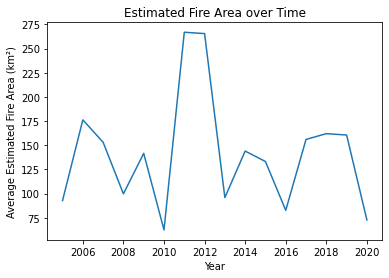

In [14]:
df_new.plot(x=df_new.index, y=df_new.values)
plt.xlabel('Year')
plt.ylabel('Average Estimated Fire Area (km²)')
plt.title('Estimated Fire Area over Time')
plt.show()

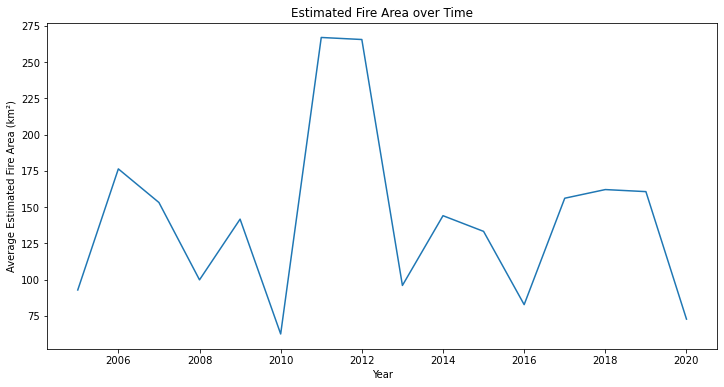

In [15]:
# Let's increase the figure size
plt.figure(figsize=(12, 6))
df_new.plot(x=df_new.index, y=df_new.values)
plt.xlabel('Year')
plt.ylabel('Average Estimated Fire Area (km²)')
plt.title('Estimated Fire Area over Time')
plt.show()

In [16]:
# TASK 1.2: You can notice the peak in the plot between 2010 to 2013. 

# Let's narrow down our finding, by plotting the estimated fire area for year grouped together with month.

In [17]:
df_new2=df.groupby(['Year','Month'])['Estimated_fire_area'].mean()
df_new2

Year  Month
2005  1         70.619908
      2        101.018747
      3         40.901576
      4         69.305388
      5         93.834520
                  ...    
2020  6         53.951983
      7         74.716558
      8         31.242304
      9         47.557737
      10        69.045950
Name: Estimated_fire_area, Length: 190, dtype: float64

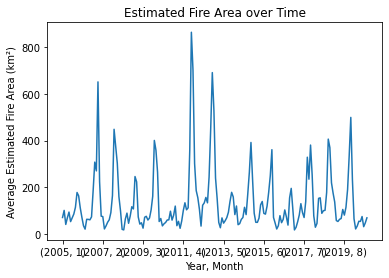

In [18]:
df_new2.plot(x=df_new2.index, y=df_new2.values)
plt.xlabel('Year, Month')
plt.ylabel('Average Estimated Fire Area (km²)')
plt.title('Estimated Fire Area over Time')
plt.show()

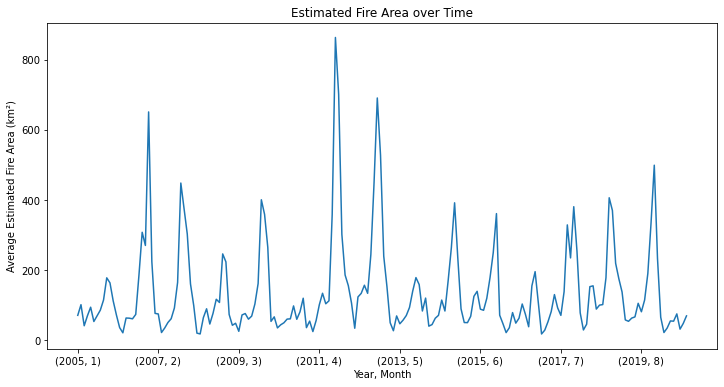

In [19]:
# We need to increase the size of the chart
plt.figure(figsize=(12, 6))
df_new2.plot(x=df_new2.index, y=df_new2.values)
plt.xlabel('Year, Month')
plt.ylabel('Average Estimated Fire Area (km²)')
plt.title('Estimated Fire Area over Time')
plt.show()

In [20]:
# This plot represents that the estimated fire area was on its peak after 2011, April and before 2012.

In [21]:
# TASK 1.3: Let's have an insight on the distribution of mean estimated fire brightness across the regions

# Use the functionality of seaborn to develop a barplot

In [22]:
# Before starting with the plot, why not know the regions mentioned in the dataset?
df['Region'].unique()

array(['NSW', 'NT', 'QL', 'SA', 'TA', 'VI', 'WA'], dtype=object)

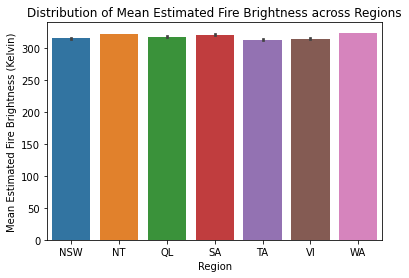

In [23]:
sns.barplot(data=df, x='Region', y='Mean_estimated_fire_brightness')
plt.xlabel('Region')
plt.ylabel('Mean Estimated Fire Brightness (Kelvin)')
plt.title('Distribution of Mean Estimated Fire Brightness across Regions')
plt.show()

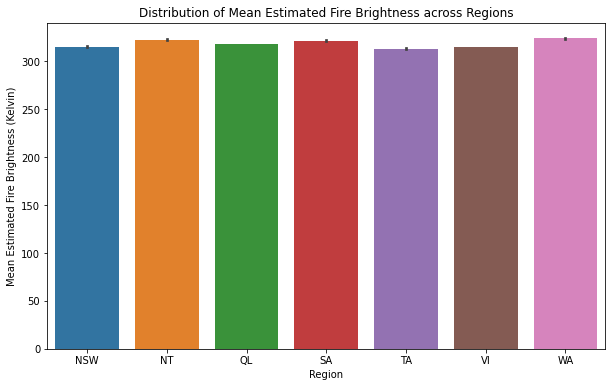

In [24]:
# Increase the size of the chart

plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Region', y='Mean_estimated_fire_brightness')
plt.xlabel('Region')
plt.ylabel('Mean Estimated Fire Brightness (Kelvin)')
plt.title('Distribution of Mean Estimated Fire Brightness across Regions')
plt.show()


In [25]:
# TASK 1.4: Let's find the portion of count of pixels for presumed vegetation fires vary across regions. 

# We will develop a pie chart for this

In [26]:
region_counts = df.groupby('Region')['Count'].sum()
region_counts

Region
NSW    117412
NT     649430
QL     420882
SA      35160
TA      11473
VI      52473
WA     615968
Name: Count, dtype: int64

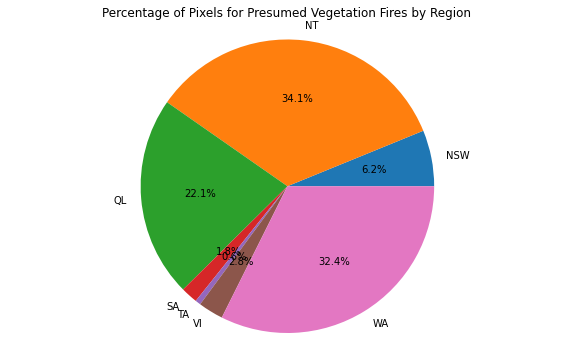

In [27]:
plt.figure(figsize=(10, 6))
plt.pie(region_counts, labels=region_counts.index, autopct='%1.1f%%')
plt.title('Percentage of Pixels for Presumed Vegetation Fires by Region')
plt.axis('equal')
plt.show()

In [28]:
# TASK 1.5: See the percentage on the pie is not looking so good as it is overlaped for Region SA, TA, VI 

# Remove the autopct from pie function and pass the following to plt.legend() after plt.title()

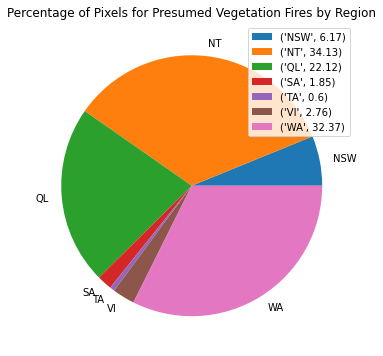

In [29]:
plt.figure(figsize=(10, 6))
plt.pie(region_counts, labels=region_counts.index)
plt.title('Percentage of Pixels for Presumed Vegetation Fires by Region')
plt.legend([(i,round(k/region_counts.sum()*100,2)) for i,k in zip(region_counts.index, region_counts)])
plt.show()

In [30]:
# TASK 1.6: Let's try to develop a histogram of the mean estimated fire brightness

# Using Matplotlib to create the histogram

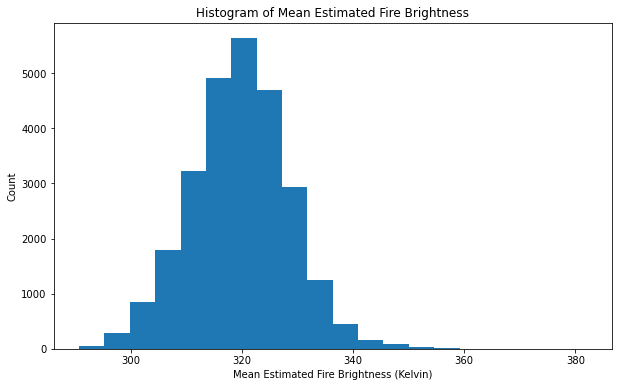

In [31]:
plt.figure(figsize=(10, 6))
plt.hist(x=df['Mean_estimated_fire_brightness'], bins=20)
plt.xlabel('Mean Estimated Fire Brightness (Kelvin)')
plt.ylabel('Count')
plt.title('Histogram of Mean Estimated Fire Brightness')
plt.show()

In [32]:
# TASK 1.7: What if we need to understand the distribution of estimated fire brightness across regions? 

# Let's use the functionality of seaborn and pass region as hue

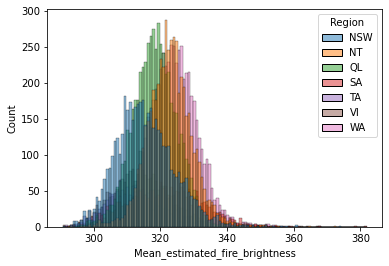

In [33]:
sns.histplot(data=df, x='Mean_estimated_fire_brightness', hue='Region')
plt.show()

In [34]:
# Now include the parameter `multiple='stack'` in the histplot() and see the difference. 

# Include labels and titles as well

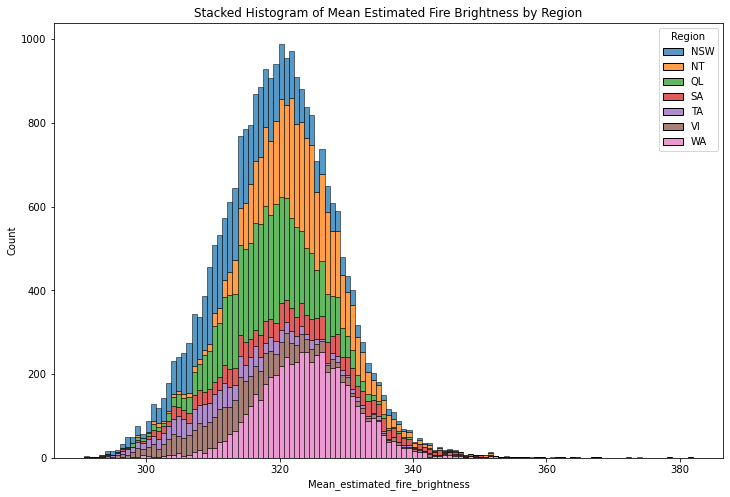

In [35]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.histplot(data=df, x ='Mean_estimated_fire_brightness', hue ='Region', multiple ='stack').set(title='Stacked Histogram of Mean Estimated Fire Brightness by Region')
plt.show()

In [36]:
# TASK 1.8: Let's try to find if there is any correlation between mean estimated fire radiative power and mean confidence level

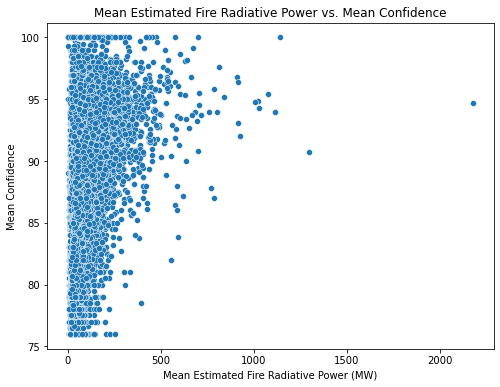

In [37]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Mean_estimated_fire_radiative_power', y='Mean_confidence')
plt.xlabel('Mean Estimated Fire Radiative Power (MW)')
plt.ylabel('Mean Confidence')
plt.title('Mean Estimated Fire Radiative Power vs. Mean Confidence')
plt.show()

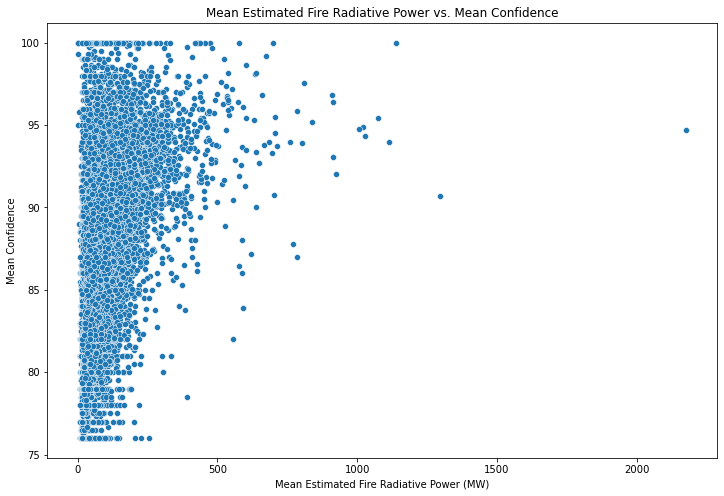

In [38]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(data=df, x='Mean_estimated_fire_radiative_power', y='Mean_confidence')
plt.xlabel('Mean Estimated Fire Radiative Power (MW)')
plt.ylabel('Mean Confidence')
plt.title('Mean Estimated Fire Radiative Power vs. Mean Confidence')
plt.show()

In [39]:
# TASK 1.9: Let's mark these seven regions on the Map of Australia using Folium

In [40]:
# We have created a dataframe for you containing the regions, their latitudes and longitudes.

In [41]:
# For australia use [-25, 135] as location to create the map

In [42]:
region_data = {'region':['NSW','QL','SA','TA','VI','WA','NT'], 'Lat':[-31.8759835,-22.1646782,-30.5343665,-42.035067,-36.5986096,-25.2303005,-19.491411], 
               'Lon':[147.2869493,144.5844903,135.6301212,146.6366887,144.6780052,121.0187246,132.550964]}
df_reg=pd.DataFrame(region_data)
df_reg

,region,Lat,Lon
0,NSW,-31.875984,147.286949
1,QL,-22.164678,144.584490
2,SA,-30.534367,135.630121
3,TA,-42.035067,146.636689
4,VI,-36.598610,144.678005
5,WA,-25.230300,121.018725
6,NT,-19.491411,132.550964


In [43]:
# define the world map centered around Australia 
aus_map = folium.Map(location=[-25, 135], zoom_start=5)
aus_map

In [44]:
# instantiate a feature group 
aus_regions = folium.map.FeatureGroup()

# Create a Folium map centered on Australia
aus_map = folium.Map(location=[-25, 135], zoom_start=4)

# loop through the region and add to feature group
for lat, lng, lab in zip(df_reg.Lat, df_reg.Lon, df_reg.region):
    aus_regions.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            popup=lab,
            radius=5, # define how big you want the circle markers to be
            color='red',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add Regions to map
aus_map.add_child(aus_regions)